# Titanic_Survival_Dataset

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Reading Train and Test Data and verify the missing Values

In [82]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.info()

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Visualization for Age Column using seaborn

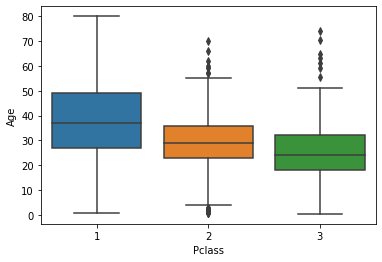

In [84]:
sns.boxplot(y=train['Age'], x=train['Pclass'])

# Handling Missing Values of Age Column (having highest Missing ValuesCoun)

In [85]:
def missinghandleData(data):
    age = data[0]
    Pclass = data[1]
    if pd.isnull(age):
        if Pclass ==1:
            return 37
        if Pclass == 2:
            return 27
        else:
            return 29
    else:
        return age
    

train['Age'] = train[['Age', 'Pclass']].apply(missinghandleData,1)
test['Age'] = test[['Age', 'Pclass']].apply(missinghandleData,1)

# Handling other Columns Missing Data

In [86]:
train.drop(['Name','Cabin', 'Ticket'], axis=1, inplace = True)
test.drop(['Name','Cabin', 'Ticket'],axis=1, inplace = True)#dropping bcz Not relevant Features


train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

test.Fare.fillna(test.Fare.mean(), inplace=True)
test.Embarked.fillna(test.Embarked.mode()[0], inplace=True)

# Converting Object DataType to Numeric

In [88]:
labelencoder_Y = preprocessing.LabelEncoder()
def convertType(data):
    for col in data:
        if data[col].dtype == 'object':
            data[col] = labelencoder_Y.fit_transform(data[col])
    return data

train = convertType(train)
test = convertType(test)

# Apply the Model

In [90]:
Y_train = train.Survived
#X_train = train[['PassengerId','Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
X_train = train.drop(['Survived'], axis = 1)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

# Test the Model

In [91]:
X_test = test[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
y_pred = model.predict(X_test)

In [92]:
sample = pd.read_csv("gender_submission.csv")
surv = sample.Survived

In [93]:
from sklearn import metrics
score = metrics.accuracy_score(y_pred,surv)

In [94]:
score*100

93.30143540669856

In [ ]:
final.to_csv('F:\Kaggle_competition\house-prices-advanced-regression-techniques/Housing_Predictions.csv',index = False,header = True)